In [1]:
## ANN chiller group model
import pandas as pd

# Load the data
data = pd.read_csv('chillerGroupResults.csv')

# Display the first few rows of the dataset
print(data.shape)
data.drop_duplicates(subset = ['Time'], inplace = True)
print(data.shape)
data.reset_index(drop = True, inplace = True)
data.head()


(9316, 16)
(9006, 16)


,Time,chillersFMU.mCenChi,chillersFMU.mAbsChi,chillersFMU.TWetBul,chillersFMU.Qchp,chillersFMU.mChiWat,chillersFMU.pChi,chillersFMU.pFan,chillersFMU.TchiSup,chillersFMU.TchiAbsSup,chillersFMU.QchiAbs,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.absChiOn,chillersFMU.yVal,chillersFMU.pPum
0,0.0,0.0,0.0,264.37,1000000.00,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
1,3600.0,0.0,0.0,264.37,1000456.60,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
2,7200.0,0.0,0.0,263.23,1000913.25,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
3,10800.0,0.0,0.0,262.86,1001369.90,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
4,14400.0,0.0,0.0,261.82,1001826.50,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0


In [3]:
# Outlier clipping
inputs = ['chillersFMU.TWetBul', 'chillersFMU.mChiWat', 'chillersFMU.Qchp', 'chillersFMU.absChiOn', 'chillersFMU.yVal',] ##States and actions
outputs = ['chillersFMU.pPumAbs', 'chillersFMU.pFanAbs', 'chillersFMU.pPum', 'chillersFMU.pFan', 
            'chillersFMU.TchiAbsSup', 'chillersFMU.TchiSup', 'chillersFMU.pChi', 
           'chillersFMU.QchiAbs','chillersFMU.mAbsChi','chillersFMU.mCenChi' ] 


# 1st output, 2nd input predicts 2nd output
# 2nd output, 3rd input predicts 3rd output

columns = inputs + outputs

mean = data[columns].mean()
q1 = data[columns].quantile(0.25)
q3 = data[columns].quantile(0.75)
iqr = q3 - q1
# data[columns] = data[columns].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis = 1)
data.head()

,Time,chillersFMU.mCenChi,chillersFMU.mAbsChi,chillersFMU.TWetBul,chillersFMU.Qchp,chillersFMU.mChiWat,chillersFMU.pChi,chillersFMU.pFan,chillersFMU.TchiSup,chillersFMU.TchiAbsSup,chillersFMU.QchiAbs,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.absChiOn,chillersFMU.yVal,chillersFMU.pPum
0,0.0,0.0,0.0,264.37,1000000.00,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
1,3600.0,0.0,0.0,264.37,1000456.60,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
2,7200.0,0.0,0.0,263.23,1000913.25,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
3,10800.0,0.0,0.0,262.86,1001369.90,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0
4,14400.0,0.0,0.0,261.82,1001826.50,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0,0.0,0.0


In [5]:
# # Define inputs and outputs
# ##ANN outputs

# # Create input and output datasets
# X = pd.concat([data[inputs].iloc[1:].reset_index(drop = True), data[outputs].iloc[:-1]], axis=1)
# y = data[outputs].iloc[1:]

# X.index = data.Time[1:]
# y.index = data.Time[1:]
# # X = X.iloc[1:]
# # X = pd.concat([X, y.iloc[:-1]], axis=1, ignore_index=True)

X = data[inputs]
y = data[outputs]

In [6]:
X.head()

,chillersFMU.TWetBul,chillersFMU.mChiWat,chillersFMU.Qchp,chillersFMU.absChiOn,chillersFMU.yVal
0,264.37,0.0,1000000.00,0,0.0
1,264.37,0.0,1000456.60,0,0.0
2,263.23,0.0,1000913.25,0,0.0
3,262.86,0.0,1001369.90,0,0.0
4,261.82,0.0,1001826.50,0,0.0


In [7]:
y.head()

,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.pPum,chillersFMU.pFan,chillersFMU.TchiAbsSup,chillersFMU.TchiSup,chillersFMU.pChi,chillersFMU.QchiAbs,chillersFMU.mAbsChi,chillersFMU.mCenChi
0,0.0,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,5000.0,293.15,293.15,0.0,0.0,0.0,0.0


In [8]:
X.shape

(9006, 5)

In [9]:
y.shape

(9006, 10)

In [10]:
# index = pd.Series(X.index)
# index[(index >= 2*30*86400) & (index<=3*30*86400)]

In [9]:
month = 30*86400
import numpy as np
def split_data_20_10(X, y):
    X_train, X_test, y_train, y_test = [], [], [], []
    index = pd.Series(X.index)
    for i in range(0, int(X.index[-1])//month):

        index_filter = index[(index >= i*30*86400) & (index<=(i+1)*30*86400)]
        
        X_train.append(X.loc[index_filter[:int(len(index_filter)*0.7)]])
        y_train.append(y.loc[index_filter[:int(len(index_filter)*0.7)]])
        X_test.append(X.loc[index_filter[int(len(index_filter)*0.7):]])
        y_test.append(y.loc[index_filter[int(len(index_filter)*0.7):]])

    return np.vstack(X_train), np.vstack(X_test), np.vstack(y_train), np.vstack(y_test)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Split the data
# X_train, X_test, y_train, y_test = X.iloc[:int(0.8*len(X))], X.iloc[int(0.8*len(X)):], y.iloc[:int(0.8*len(y))], y.iloc[int(0.8*len(y)):]

# Normalize the features
scaler_X = MinMaxScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)



In [14]:
X_train.shape

(6304, 5)

In [16]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class ChillerTimeSeriesModel(pl.LightningModule):
    def __init__(self, input_size, output_size, learning_rate=1e-3, n_timesteps = 10):
        super(ChillerTimeSeriesModel, self).__init__()
        self.learning_rate = learning_rate
        
        # Define the architecture
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, output_size),
            nn.Sigmoid(),
        )
        
        # Loss function
        self.loss_fn = nn.MSELoss()
        self.n_timesteps = n_timesteps
    
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        X_batch, y_batch = batch
        
        loss = 0.0
        
        pred = model(X_batch)
        loss+= self.loss_fn(pred, y_batch)
#         for i in range(self.n_timesteps):
            
#             pred = self()
#             loss += self.loss_fn(
        
        # for i in range(X_batch.size(0) - self.n_timesteps):  # For each observation
        #     predictions = []
        #     # Initialize prediction with the first timestep
        #     prediction = self(X_batch[i].unsqueeze(0))  # Forward pass
        #     predictions.append(prediction)
            
        #     for t in range(1, self.n_timesteps):
        #         # Generate predictions for the next timesteps
        #         input_seq = torch.cat((X_batch[i + t, :4], prediction.squeeze()), dim=0).unsqueeze(0)
        #         prediction = self(input_seq)
        #         predictions.append(prediction)
            
        #     # Compute loss for the sequence of predictions against ground truth
        #     y_true = y_batch[i:i+self.n_timesteps]
        #     y_pred = torch.cat(predictions).view(self.n_timesteps, -1)
        #     loss += self.loss_fn(y_pred, y_true)
        
        self.log("loss", loss, on_step = True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

# Create the PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=50, logger=True)

# Assuming X_train and y_train are your data as PyTorch tensors
# Convert your dataset to PyTorch DataLoader
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate the model
input_size = X_train.shape[1]
output_size = len(outputs)
model = ChillerTimeSeriesModel(input_size, output_size)

# Train the model
trainer.fit(model, train_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name    | Type       | Params
---------------------------------------
0 | model   | Sequential | 9.7 K 
1 | loss_fn | MSELoss    | 0     
---------------------------------------
9.7 K     Trainable params
0         Non-trainable params
9.7 K     Total params
0.039     Total estimated model params size (MB)


Epoch 49: 100%|██████████| 197/197 [00:02<00:00, 94.29it/s, v_num=14, loss_step=0.00373, loss_epoch=0.00134]  

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 197/197 [00:02<00:00, 93.15it/s, v_num=14, loss_step=0.00373, loss_epoch=0.00134]


In [17]:
# Make predictions
import matplotlib.pyplot as plt
with torch.no_grad():
    y_pred = model(torch.Tensor(X_test)).numpy()

# Convert predictions and actual values to DataFrames for easier manipulation
predictions_df = pd.DataFrame(scaler_y.inverse_transform(y_pred), columns=outputs)
actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test), columns=outputs)


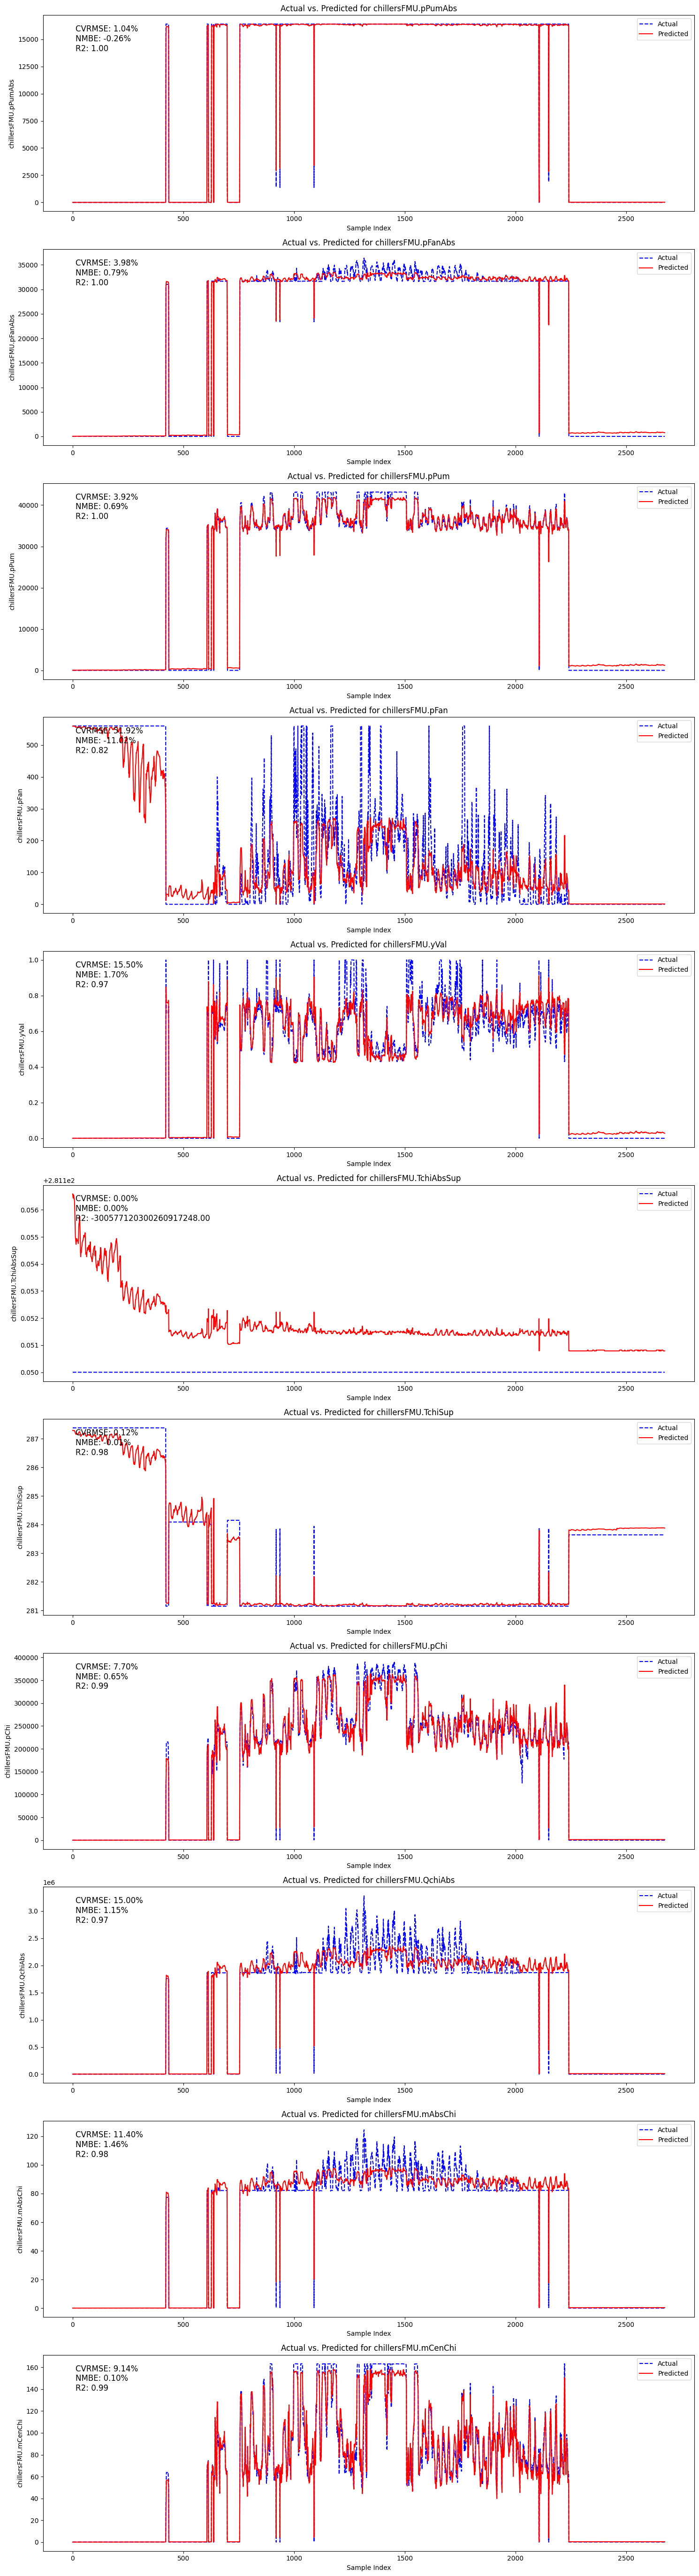

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actuals, predictions):
    metrics = {}
    for output in actuals.columns:
        actual_values = actuals[output]
        predicted_values = predictions[output]
        
        # Calculate metrics
        mse = mean_squared_error(actual_values, predicted_values)
        rmse = np.sqrt(mse)
        mean_actual = np.mean(actual_values)
        
        # CVRMSE (Coefficient of Variation of RMSE)
        cvrmse = (rmse / mean_actual) * 100
        
        # NMBE (Normalized Mean Bias Error)
        nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
        
        # R2 (Coefficient of Determination)
        r2 = r2_score(actual_values, predicted_values)
        
        metrics[output] = {'CVRMSE': cvrmse, 'NMBE': nmbe, 'R2': r2}
    return metrics

def plot_actual_vs_predicted(actuals, predictions, output_names):
    metrics = calculate_metrics(actuals, predictions)
    
    num_outputs = len(output_names)
    plt.figure(figsize=(15, num_outputs * 5))
    
    for i, output in enumerate(output_names):
        plt.subplot(num_outputs, 1, i + 1)
        plt.plot(actuals.index, actuals[output], label='Actual', color='blue', linestyle='--')
        plt.plot(predictions.index, predictions[output], label='Predicted', color='red', linestyle='-')
        
        # Retrieve metrics for current output
        cvrmse = metrics[output]['CVRMSE']
        nmbe = metrics[output]['NMBE']
        r2 = metrics[output]['R2']
        
        # Print metrics on plot
        plt.title(f'Actual vs. Predicted for {output}')
        plt.xlabel('Sample Index')
        plt.ylabel(output)
        plt.legend()
        plt.text(0.05, 0.95, f'CVRMSE: {cvrmse:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.90, f'NMBE: {nmbe:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.85, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Call the updated plotting function
plot_actual_vs_predicted(actuals_df, predictions_df, outputs)


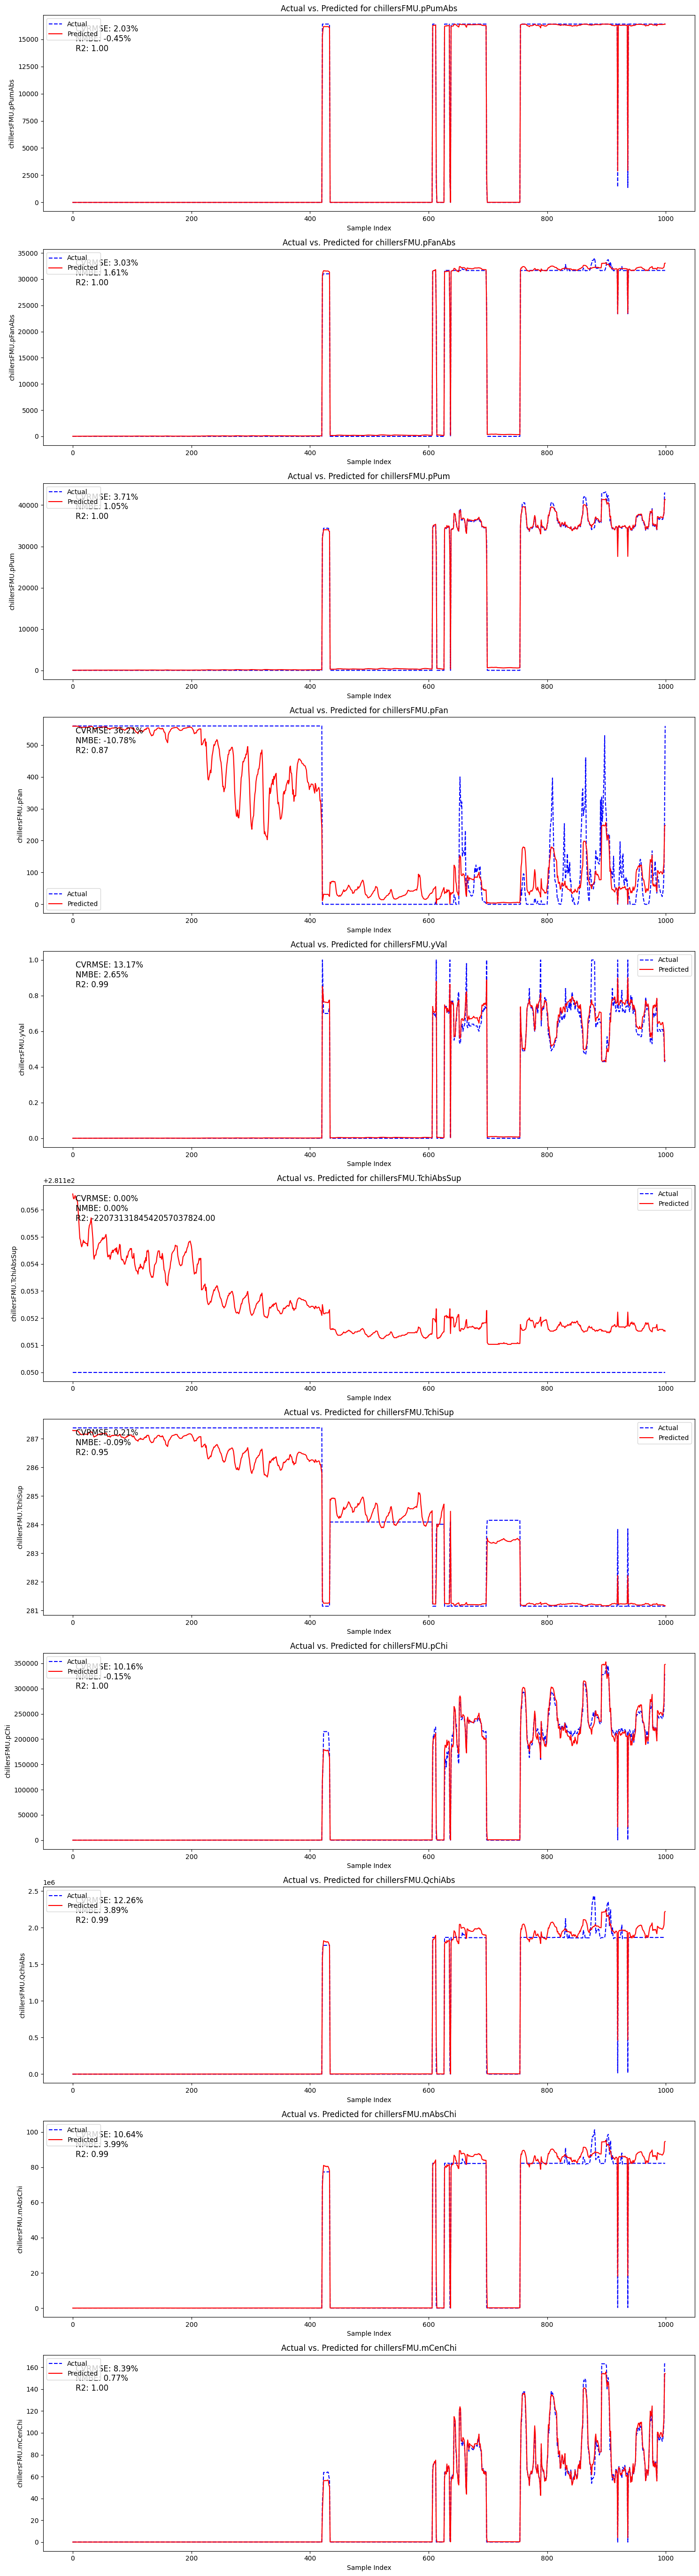

In [24]:
predictions = []

with torch.no_grad():
    prediction = model(torch.Tensor(X_test[0].reshape(1, -1))).numpy()
    predictions.append(prediction)
    for row_idx in range(1, 1000):

        
        prediction = model(torch.Tensor(np.concatenate([X_test[row_idx][:4], prediction.reshape(-1, )]).reshape(1, -1))).numpy()
        predictions.append(prediction)

    predictions = np.array(predictions)
    predictions_df = pd.DataFrame(scaler_y.inverse_transform(predictions.reshape(-1, y_test.shape[1])), columns=outputs)
    actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test[:1000]), columns=outputs)    
    plot_actual_vs_predicted(actuals_df, predictions_df, outputs)


In [25]:
predictions_df['chillersFMU.TchiAbsSup']

0      281.156586
1      281.156433
2      281.156403
3      281.156464
4      281.156525
          ...    
995    281.151581
996    281.151550
997    281.151520
998    281.151550
999    281.151520
Name: chillersFMU.TchiAbsSup, Length: 1000, dtype: float32

In [26]:
actuals_df['chillersFMU.TchiAbsSup']

0      281.15
1      281.15
2      281.15
3      281.15
4      281.15
        ...  
995    281.15
996    281.15
997    281.15
998    281.15
999    281.15
Name: chillersFMU.TchiAbsSup, Length: 1000, dtype: float64